In [26]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K 
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers, activations 

import pylab as plt
import matplotlib.pyplot as plt
import numpy as np

In [27]:
base_dir = "../../veriler/tensorflow_f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="training", batch_size=2)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(500,500), subset="validation", batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


Functional Model

In [28]:
from keras.layers import Input
from keras.layers import concatenate
from keras.models import Model

In [29]:
input_ = Input(shape=(500,500,3 ))

conv11 = Conv2D(filters=4, kernel_size=(2,2), activation="relu")(input_)
max11 = MaxPooling2D((2,2))(conv11)
conv12 = Conv2D(filters=8, kernel_size=(2,2), activation="relu")(max11)
max12 = MaxPooling2D((2,2))(conv12)

flat1 = Flatten()(max12)

conv21 = Conv2D(filters=4, kernel_size=(3,3), activation="relu")(input_)
max21 = MaxPooling2D((2,2))(conv21)
conv22 = Conv2D(filters=8, kernel_size=(2,2), activation="relu")(max21)
max22 = MaxPooling2D((2,2))(conv22)

flat2 = Flatten()(max22)

merge = concatenate([flat1, flat2])

fc1 = Dense(50, activation="relu")(merge)
fc2 = Dense(101, activation="relu")(fc1)
fc3 = Dense(49, activation="relu")(fc2)
fc4 = Dense(99, activation="relu")(fc3)
fc5 = Dense(48, activation="relu")(fc4)
fc6 = Dense(23, activation="relu")(fc5)
out = Dense(4, activation="softmax")(fc6)

model = Model(inputs= input_, outputs = out)


In [30]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 499, 499, 4)  52          ['input_8[0][0]']                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 498, 498, 4)  112         ['input_8[0][0]']                
                                                                                                  
 max_pooling2d_19 (MaxPooling2D  (None, 249, 249, 4)  0          ['conv2d_19[0][0]']        

Model Eğitimi

In [31]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [32]:
model.compile(optimizer=optimizer, loss=loss, metrics=["mse","accuracy"])

In [33]:
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 130s 975ms/step - loss: 1.6935 - mse: 0.2037 - accuracy: 0.2857 - val_loss: 1.5178 - val_mse: 0.2085 - val_accuracy: 0.2500
Epoch 2/5
126/126 [==============================] - 120s 947ms/step - loss: 1.2711 - mse: 0.1719 - accuracy: 0.4286 - val_loss: 1.2128 - val_mse: 0.1668 - val_accuracy: 0.4286
Epoch 3/5
126/126 [==============================] - 128s 1s/step - loss: 0.8865 - mse: 0.1246 - accuracy: 0.6230 - val_loss: 1.3485 - val_mse: 0.1831 - val_accuracy: 0.2857
Epoch 4/5
126/126 [==============================] - 126s 999ms/step - loss: 0.7244 - mse: 0.1039 - accuracy: 0.7183 - val_loss: 1.2274 - val_mse: 0.1765 - val_accuracy: 0.4286
Epoch 5/5
126/126 [==============================] - 130s 1s/step - loss: 0.4673 - mse: 0.0676 - accuracy: 0.8175 - val_loss: 1.5414 - val_mse: 0.1950 - val_accuracy: 0.2857


In [34]:
result.history

{'loss': [1.69346022605896,
  1.2710912227630615,
  0.8865090012550354,
  0.7244234085083008,
  0.4673207998275757],
 'mse': [0.20369647443294525,
  0.1719312071800232,
  0.12455214560031891,
  0.10392801463603973,
  0.06756263226270676],
 'accuracy': [0.2857142984867096,
  0.4285714328289032,
  0.6230158805847168,
  0.7182539701461792,
  0.817460298538208],
 'val_loss': [1.5178186893463135,
  1.2128251791000366,
  1.3484700918197632,
  1.2274237871170044,
  1.5414044857025146],
 'val_mse': [0.20846784114837646,
  0.16682466864585876,
  0.18309542536735535,
  0.17649376392364502,
  0.19496813416481018],
 'val_accuracy': [0.25,
  0.4285714328289032,
  0.2857142984867096,
  0.4285714328289032,
  0.2857142984867096]}

Görselleştirme

In [40]:
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
acc_loss = result.history["loss"]
val_loss = result.history["val_loss"]

In [41]:
epoch = range(1, len(acc)+1)

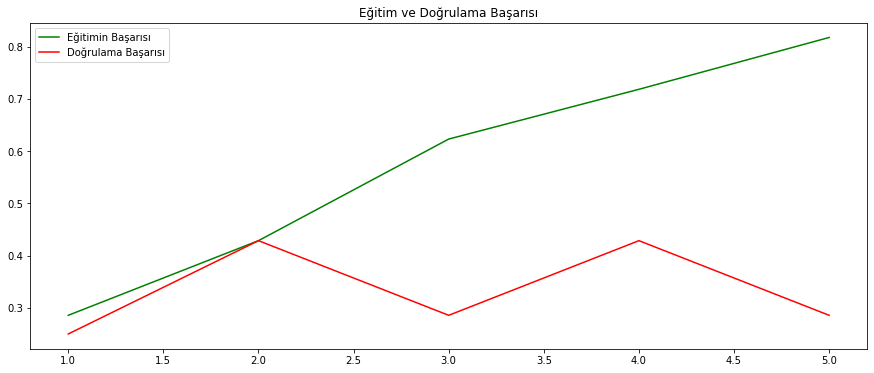

In [42]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc, label=("Eğitimin Başarısı"), color="g")
plt.plot(epoch, val_acc, label=("Doğrulama Başarısı"), color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

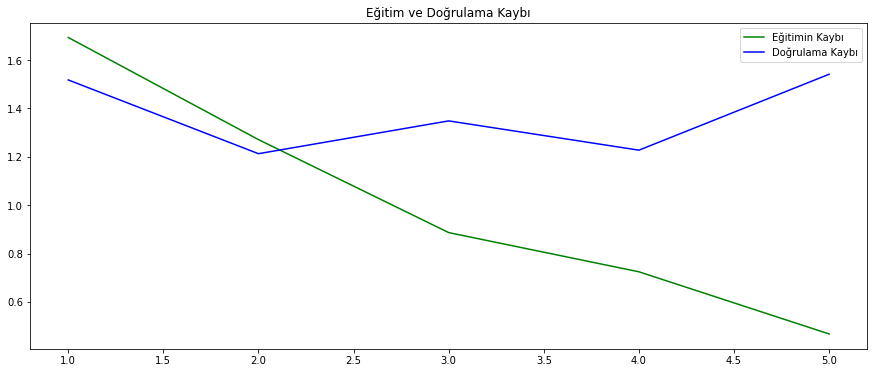

In [44]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc_loss, label=("Eğitimin Kaybı"), color= "g")
plt.plot(epoch, val_loss, label=("Doğrulama Kaybı"), color = "b")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()